In [1]:
#Import the necessary libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as  plt

df = pd.read_csv("C:/Users/tirth/Documents/Untitled Folder/NN with numpy/train.csv")

In [2]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since I need to work with just Numpy I will convert the data into a numpy array and shuffle it 

In [3]:
df = np.array(df)

Theres always a chance of overfitting so we are going to set aside a chunk of data so we can validate the parameters later on and avoid overfitting.

In [4]:
m,n = df.shape
np.random.shuffle(df)

In [5]:
df_CV = df[0:1000].T
Y_CV = df_CV[0]
X_CV = df_CV[1:n]
X_CV = X_CV / 255.
#This is the chunk of data we save for later

In [6]:
#This is the data we will work with 
df_train =df[1000:m].T
Y_train = df_train[0]
X_train = df_train[1:n]
X_train = X_train / 255.
_,a_train = X_train.shape

In [7]:
Y_train

array([8, 0, 6, ..., 9, 8, 2], dtype=int64)

In [8]:
def init_params():
    # Initialize the parameters W1, b1, W2, and b2 with random values
    W1 = np.random.rand(10, 784) - 0.5 # Weight matrix for the first layer (10 units, 784 features)
    b1 = np.random.rand(10, 1) - 0.5  # Bias vector for the first layer (10 units)
    W2 = np.random.rand(10, 10) - 0.5 # Weight matrix for the second layer (10 units, 10 units)
    b2 = np.random.rand(10, 1) - 0.5  # Bias vector for the second layer (10 units)
    return W1, b1, W2, b2

def ReLU(Z):
    # Applies the Rectified Linear Unit (ReLU) activation function element-wise to Z
    return np.maximum(Z, 0)

def softmax(Z):
    # Applies the softmax activation function to Z
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    # Performs forward propagation through the neural network
    Z1 = W1.dot(X) + b1 # Linear transformation for the first layer
    A1 = ReLU(Z1) # Activation of the first layer
    Z2 = W2.dot(A1) + b2 # Linear transformation for the second layer
    A2 = softmax(Z2)  # Activation of the second layer
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    # Computes the derivative of ReLU activation function element-wise to Z
    return Z > 0

def one_hot(Y):
    # Converts the label vector Y into one-hot encoded format
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Performs backward propagation to compute the gradients of the parameters
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y # Gradient of the second layer output with respect to Z2
    dW2 = 1 / m * dZ2.dot(A1.T) # Gradient of W2
    db2 = 1 / m * np.sum(dZ2)  # Gradient of b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) # Gradient of the first layer output with respect to Z1
    dW1 = 1 / m * dZ1.dot(X.T) # Gradient of W1
    db1 = 1 / m * np.sum(dZ1) # Gradient of b1
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Updates the parameters using gradient descent
    W1 = W1 - alpha * dW1 # Update W1
    b1 = b1 - alpha * db1 # Update b1 
    W2 = W2 - alpha * dW2 # Update W2
    b2 = b2 - alpha * db2 # Update b2   
    return W1, b1, W2, b2

def get_predictions(A2):
    # Returns the predicted labels based on the output probabilities A2
    return np.argmax(A2,0)
def get_accuracy (predictions, Y):
    # Computes the accuracy of the predicted labels compared to the actual labels Y
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X,Y, alpha, iterations):
    # Performs gradient descent to train the neural network
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 3 4 ... 4 8 8] [8 0 6 ... 9 8 2]
0.08841463414634146
Iteration:  10
[8 9 5 ... 7 8 8] [8 0 6 ... 9 8 2]
0.19058536585365854
Iteration:  20
[8 0 5 ... 7 8 8] [8 0 6 ... 9 8 2]
0.2735365853658537
Iteration:  30
[8 0 1 ... 9 8 8] [8 0 6 ... 9 8 2]
0.37946341463414635
Iteration:  40
[8 0 1 ... 9 4 8] [8 0 6 ... 9 8 2]
0.44409756097560976
Iteration:  50
[8 0 1 ... 9 4 8] [8 0 6 ... 9 8 2]
0.4949268292682927
Iteration:  60
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.5373170731707317
Iteration:  70
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.5711951219512195
Iteration:  80
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6011463414634146
Iteration:  90
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6241463414634146
Iteration:  100
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6428048780487805
Iteration:  110
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6604878048780488
Iteration:  120
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6747317073170732
Iteration:  130
[8 0 6 ... 9 4 2] [8 0 6 ... 9 8 2]
0.6880243902439024
Iteration:  1

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    # Makes predictions for the input data X using the trained parameters W1, b1, W2, and b2
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    # Tests the prediction of the trained model on a specific example with the given index
    current_image = X_train[:, index, None]  # Extracts the image data for the given index
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2) # Makes predictions using the trained parameters
    label = Y_train[index] # Retrieves the corresponding label for the given index 
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255 # Reshapes and scales the image data
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


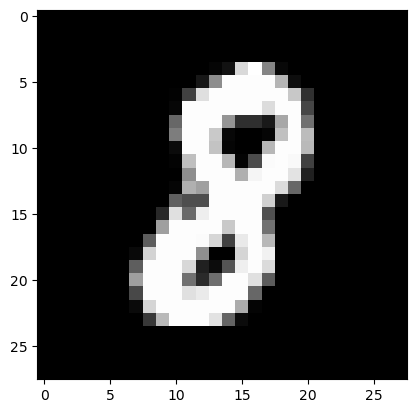

Prediction:  [0]
Label:  0


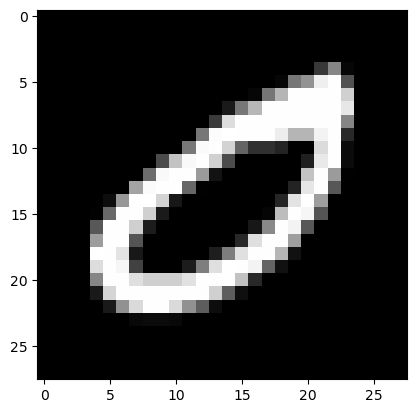

Prediction:  [6]
Label:  6


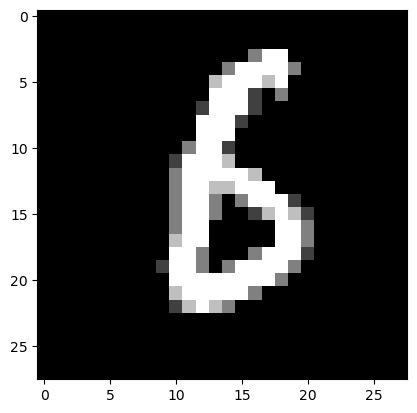

Prediction:  [8]
Label:  8


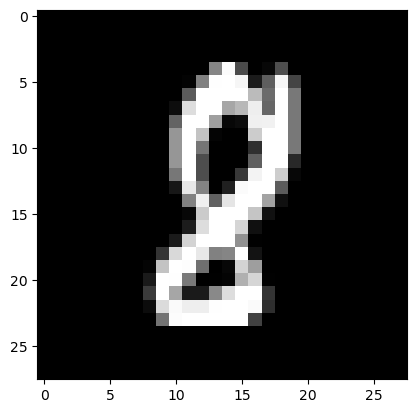

In [11]:
# Test predictions on specific examples
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [12]:
# Make predictions on the cross-validation set and compute accuracy
CV_predictions = make_predictions(X_CV, W1, b1, W2, b2)
get_accuracy(CV_predictions, Y_CV)

[6 0 5 5 4 0 6 9 7 9 6 4 9 4 8 1 0 4 2 8 7 1 6 1 9 7 4 6 3 0 6 6 2 7 1 5 0
 1 9 7 6 2 4 5 6 2 7 8 9 8 5 3 9 6 7 7 3 0 9 7 1 6 6 8 1 7 2 3 7 3 5 5 2 1
 8 6 3 3 4 5 3 6 6 7 6 0 8 1 7 0 8 4 2 8 8 0 9 0 4 9 7 3 4 1 1 7 0 3 4 9 0
 1 8 9 5 9 4 6 7 1 6 3 3 2 7 9 0 4 5 1 3 1 1 4 2 6 6 3 8 7 8 3 9 8 9 3 8 4
 5 8 2 7 8 5 9 6 0 6 3 2 3 4 1 6 9 8 0 8 7 1 1 1 8 4 2 8 4 5 1 1 8 0 0 5 4
 8 4 7 6 0 9 1 7 7 3 0 4 8 5 2 3 2 9 8 9 8 9 0 9 0 7 2 2 7 4 0 6 6 9 2 3 1
 1 8 3 1 0 9 9 5 3 4 7 3 7 3 6 9 3 7 4 0 6 2 5 2 2 9 3 7 5 1 7 7 9 8 6 6 0
 2 7 6 6 2 2 4 8 5 5 8 2 5 3 9 4 6 5 8 3 4 5 6 2 6 1 9 5 1 8 6 0 5 2 4 9 4
 9 3 6 0 5 9 1 1 4 9 5 5 1 3 6 1 3 6 9 3 4 4 1 4 6 9 4 9 0 4 6 4 8 5 6 4 3
 4 7 4 5 4 3 2 5 6 9 4 2 9 8 1 9 3 2 1 3 3 5 3 0 7 2 4 6 3 0 8 4 8 6 1 3 6
 2 5 4 3 9 8 7 7 8 3 5 5 3 4 2 3 0 3 1 0 9 1 1 6 0 0 6 4 3 1 2 7 8 0 0 1 2
 8 4 1 8 5 7 3 7 0 0 7 6 9 3 8 0 1 9 5 5 6 4 0 4 3 8 6 0 4 5 6 0 5 5 3 1 3
 3 9 3 0 6 0 2 4 6 8 7 4 5 6 1 6 5 4 4 1 1 1 8 0 9 8 2 7 9 7 2 6 1 1 8 4 1
 7 9 1 6 6 8 7 5 9 6 6 9 

0.857

The model achieved an accuracy of approximately 85% on the cross-validation set.This indicates that the model is performing well in classifying the images in the dataset. However, it is important to note that the accuracy may vary on different datasets or test sets. 